In [ ]:
import os
import sys
import itertools

input_folder = 'API_responses'
output_folder = 'extrated_response'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
for tell, prompt, length, order, sample_num in itertools.product(tells, prompts, lengths, orders, range(1, 21)):
    input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                            f'order_{order}.txt')
    output_fn = os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                f'order_{order}.txt')
    with open(input_fn, 'r') as file:
        lines = file.readlines()
        answer_line = lines[0]
        answers = answer_line.split()
        if 'Answer:' in answers:
            answers.remove('Answer:')
        extracted = ' '.join(answers)
    if not os.path.exists(os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}')):
        os.makedirs(os.path.join(output_folder, tell, prompt,
                    f'length_{length}', f'sample_{sample_num}'))
    with open(output_fn, 'w') as file:
        file.writelines(extracted)

In [10]:
"""Process GPT-4 data"""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'extrated_response'
answer_folder = 'data_ToMh_old'
response_folder = 'API_responses'
output_folder = 'check_GPT-4'
summary_file = 'GPT-4_data.txt'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
CoT_count, CoT_correct = [0, 0]
MC_count, MC_correct = [0, 0]
summary_lines = []
accuracy_data = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}

for tell, prompt, length, order in itertools.product(tells, prompts, lengths, orders):
    out_folder = os.path.join(output_folder, tell, prompt, f'length_{length}', f'order_{order}')
    summary_lines.append(f'{tell}, {prompt}, {length} chapters, {order} order: ')
    
    total_count = 0
    correct_count = 0

    for sample_num in range(1, 21):
        total_count += 1
        input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                f'order_{order}.txt')
        response_fn = os.path.join(response_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                f'order_{order}.txt')
        answer_fn = os.path.join(answer_folder, tell, 'CoT', f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
        output_fn = os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')

        with open(answer_fn, 'r') as file:
            output_lines = file.readlines()
        with open(answer_fn, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if 'Answer:' in line.split(' '):
                    correct_answer = line.split(' ', 1)[1].split('\n')[0]
                    output_lines.append('Correct answer: ' + correct_answer + '\n')
        with open(input_fn, 'r') as file:
            lines = file.readlines()
            if len(lines[0].split(' ')) == 2:
                answer_line = lines[0].split(' ')[1]
                output_lines.append('GPT-4 Answer: ' + answer_line + '\n')
            else:
                print(f"Eliminated: {tell}, {prompt}, {length} chapters, {order} order, " , lines)
                continue
        with open(response_fn, 'r') as file:
            lines = file.readlines()
            output_lines.append('GPT-4 Explain: ')
            output_lines += lines
                    
        if answer_line == correct_answer:
            correct_count += 1
        
        if not os.path.exists(os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}')):
            os.makedirs(os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}'))
        with open(output_fn, 'w') as file:
            file.writelines(output_lines)
    accuracy = correct_count / total_count
    summary_lines.append(str(accuracy) + '\n')
    accuracy_data[tell][prompt][length - 1][order] = accuracy
    with open(summary_file, 'w') as file:
        file.writelines(summary_lines)
pprint.pprint(accuracy_data)
    

Eliminated: No_Tell, CoT, 1 chapters, 1 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, CoT, 2 chapters, 1 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, CoT, 3 chapters, 3 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: No_Tell, MC, 3 chapters, 1 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 1 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 1 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 1 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 1 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 1 chapters, 0 order,  ['CONTENE_FILRER.']
Eliminated: Tell, CoT, 3 chapters, 4 order,  ['CONTENE_FILRER.']
Elim

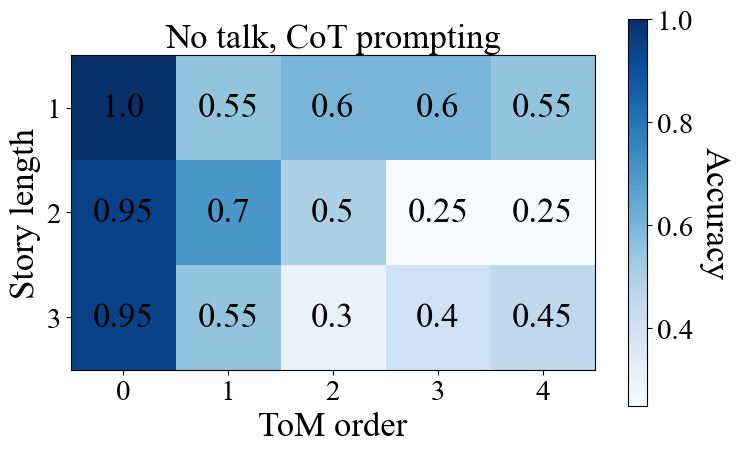

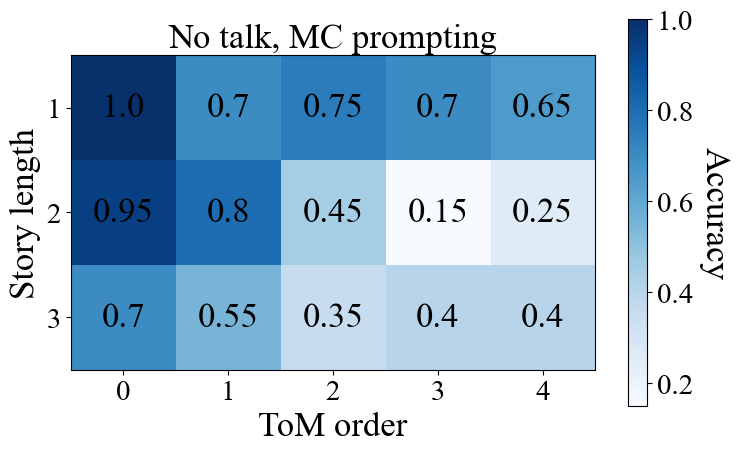

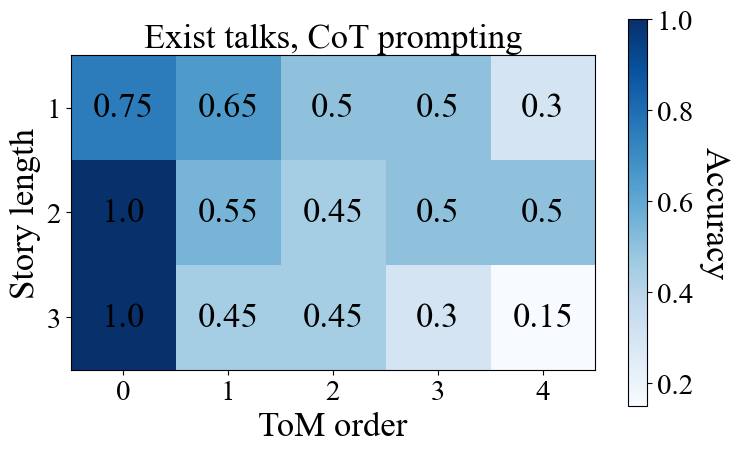

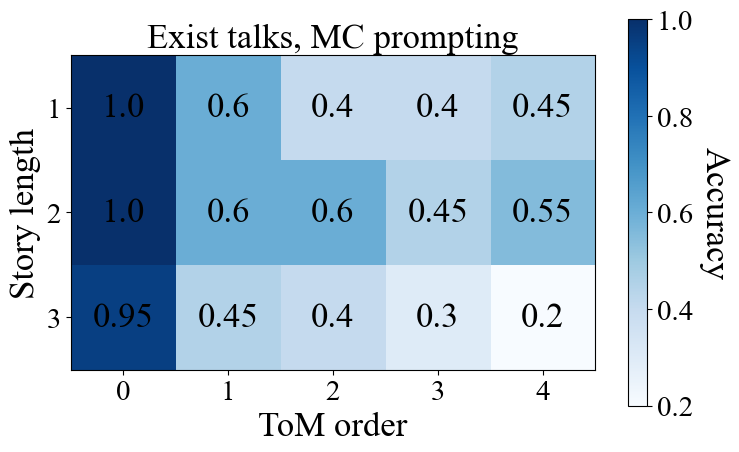

In [34]:
"""Plot heatmap for GPT-4"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 21
LEGEND_FONT_SIZE = 22

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
plt.rcParams["font.family"] = "Times New Roman"

for tell, prompt in itertools.product(tells, prompts):
    fig, ax = plt.subplots(figsize=(8, 5))
    im = ax.imshow(accuracy_data[tell][prompt], cmap=mpl.colormaps['Blues'])

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(5), rotation=45)
    ax.set_yticks(np.arange(3), labels=[1, 2, 3])
    ax.set_xlabel('ToM order')
    ax.set_ylabel('Story length')
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Accuracy", rotation=-90, va="bottom")
    communication = 'Exist talks' if tell == 'Tell' else 'No talk'
    ax.set_title(f'{communication}, {prompt} prompting')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(),
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(3):
        for j in range(5):
            text = ax.text(j, i, accuracy_data[tell][prompt][i][j],
                        ha="center", va="center", color="black")

    fig.tight_layout()
    plt.savefig(f'data_figs/{tell}_{prompt}.pdf')
    plt.show()